In [80]:
import ephem
import datetime
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   IPython.display   import Image

In [2]:
venus = ephem.Venus()

venus.compute('2020/09/11 00:50:22')

print(venus.ra, venus.dec)

8:28:58.50 17:51:55.0


In [3]:
ephem.constellation(venus)

('Cnc', 'Cancer')

In [4]:
chichen_itza       = ephem.Observer()

chichen_itza.lat   = '20.683056'
chichen_itza.lon   = '88.568611'

In [75]:
# Rising time:  2020/1/2 03:01:29

start_date         = datetime.datetime(2020, 1,   1)
start_time         = datetime.time(3, 1, 29)
start_datetime     = datetime.datetime.combine(start_date.date(), start_time)

end_date           = datetime.datetime(2029, 12, 1)

delta              = datetime.timedelta(hours=3)

datetimes          = []
angular_pos        = []

while start_datetime  <= end_date:    
    start_datetime    += delta
    
    chichen_itza.date  = start_datetime.strftime("%Y/%m/%d %H:%M:%S")
    
    venus.compute(chichen_itza)

    datetimes.append(start_datetime)
    
    angular_pos.append([chichen_itza.date, venus.az, venus.alt])
    
    # print('{} \t {:f} \t {:f} \t {} \t {}'.format(chichen_itza.date, venus.az, venus.alt, chichen_itza.next_rising(venus), chichen_itza.next_transit(venus)))

In [76]:
angular_pos = np.array(angular_pos)

In [77]:
years       = np.array([x.year for x in datetimes]) 
uyears      = np.unique(years)

In [78]:
colors      = plt.rcParams['axes.prop_cycle'].by_key()['color']

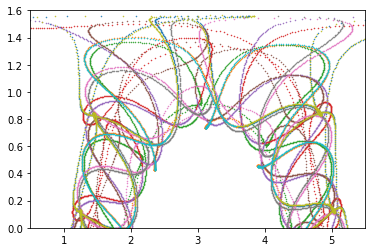

In [79]:
for color, year in zip(colors, uyears):
    in_year = years == year

    pl.xlim(left=0.5, right=5.5)
    pl.ylim(bottom=0.0, top=1.6)
    
    # http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html
    pl.plot(angular_pos[in_year,1], angular_pos[in_year,2], marker='.', lw=0.0, markersize=1)

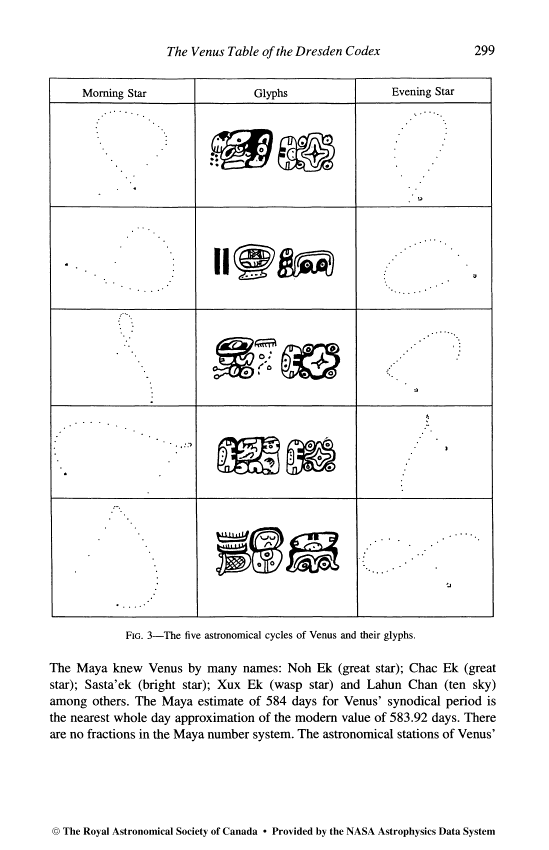

In [82]:
Image(filename='images/MayanGlyphs.gif')